Incase if you have more than one categorical varibale to compare we can use

1. Grouped bar Chart
2. Stacked Bar Chart

In [1]:
# Vertical bar graph

import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

# using inbuild data set in pydataset named as diamonds data set

D = data('diamonds')
D.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


I would like to plot average cost for each color within cut type. Here cut and color  are categorical columns and price is numerical column

In [2]:
D_cut = D.groupby(['color','cut'])['price'].mean().reset_index()

# I can round off the price value to 2 decimals value.I will also arrange the data from highest to lowest

D_cut['price'] = round(D_cut['price'],2)

D_cut = D_cut.sort_values(by = 'price',ascending = False)
D_cut.head()

,color,cut,price
33,J,Premium,6294.59
28,I,Premium,5946.18
29,I,Very Good,5255.88
23,H,Premium,5216.71
20,H,Fair,5135.68


Pandas will show grouped bars by columns. Entries in each row but different columns will constitute a group in the resulting plot.

Hence you need to 'reshape' your data frame to have the 'group' as columns. In this case you can pivot to reshape the data.

In [3]:
# Reshape the data

D_cut_color_final = D_cut.pivot("cut","color","price")
D_cut_color_final.head()

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.06,3682.31,3827.00,4239.25,5135.68,4685.45,4975.66
Good,3405.38,3423.64,3495.75,4123.48,4276.25,5078.53,4574.17
Ideal,2629.09,2597.55,3374.94,3720.71,3889.33,4451.97,4918.19
Premium,3631.29,3538.91,4324.89,4500.74,5216.71,5946.18,6294.59
Very Good,3470.47,3214.65,3778.82,3872.75,4535.39,5255.88,5103.51


C:\Users\SatishMoparthi\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


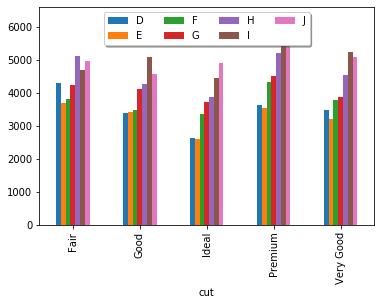

In [5]:
# Plot grouped bar chart

# Plotting the grouped bar chart

D_cut_color_final.plot(kind="bar")

# These are subplot grid parameters encoded as a single integer
# For example, "111" means "1X1" grid, first subplot" and ""234" means "2X3 grid",4th subplot".

ax = plt.subplot(111)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.00),ncol=4,fancybox=True,shadow=True)
plt.show()

C:\Users\SatishMoparthi\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


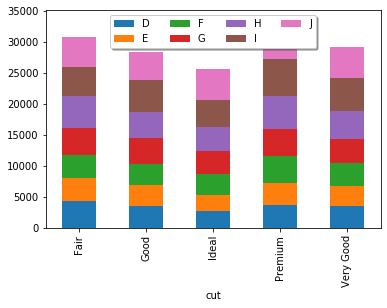

In [6]:
## Plotting stacked bar chart

D_cut_color_final.plot(kind="bar",stacked=True)

# These are subplot grid parameters encoded as a single integer
# For example, "111" means "1X1" grid, first subplot" and ""234" means "2X3 grid",4th subplot".

ax = plt.subplot(111)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.00),ncol=4,fancybox=True,shadow=True)
plt.show()